<h1>Student Grade Prediction - XGBoost Regression</h1>

#### Attribute Information:

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
<br>
2 sex - student's sex (binary: 'F' - female or 'M' - male)
<br>
3 age - student's age (numeric: from 15 to 22)
<br>
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
<br>
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
<br>
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
<br>
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
<br>
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
<br>
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
<br>
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
<br>
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
<br>
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
<br>
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
<br>
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
<br>
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
<br>
16 schoolsup - extra educational support (binary: yes or no)
<br>
17 famsup - family educational support (binary: yes or no)
<br>
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
<br>
19 activities - extra-curricular activities (binary: yes or no)
<br>
20 nursery - attended nursery school (binary: yes or no)
<br>
21 higher - wants to take higher education (binary: yes or no)
<br>
22 internet - Internet access at home (binary: yes or no)
<br>
23 romantic - with a romantic relationship (binary: yes or no)
<br>
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
<br>
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
<br>
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
<br>
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
<br>
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
<br>
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
<br>
30 absences - number of school absences (numeric: from 0 to 93)
<br>
31 G1 - first period grade (numeric: from 0 to 20)
<br>
32 G2 - second period grade (numeric: from 0 to 20)
<br>
33 G3 - final grade (numeric: from 0 to 20, output target)
<br>


#### Source: 
https://archive.ics.uci.edu/ml/datasets/student+performance

<h3>Import Dependencies</h3>

In [18]:
#import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#machine learning library from scikit-learn
import sklearn
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

<h3>Load Dataset</h3>

In [2]:
#import the dataset 
dataset = pd.read_csv('student_dataset.csv')
pd.set_option('display.max_columns',80)
dataset.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


In [3]:
#select dataset > 0 - final grade
dataset = dataset[dataset['G3'] > 0]

<h3>Data Preprocessing</h3>

In [4]:
dataset.rename(columns={
    "school":"school",
    'sex':'gender',
    'age':'age',
    'address':'address',
    'famsize':'family_size',
    'Pstatus':'parent_cohabitation',
    'Medu':'mother_edu',
    'Fedu':'father_edu',
    'Mjob':'mother_job',
    'Fjob':'father_job',
    'reason':'reason',
    'guardian':'guardian',
    'traveltime':'travel_time',
    'studytime':'study_time',
    'failures':'number_fail_class',
    'schoolsup':'school_support',
    'famsup':'family_support',
    'paid':'extra_paid_class',
    'activities':'extra_activity_curriculum',
    'nursery':'nursery',
    'higher':'higher',
    'internet':'home_internet',
    'romatic':'romatic',
    'famrel':'family_relationship',
    'freetime':'free_time',
    'goout':'go_out',
    'Dalc':'daily_alcohol',
    'Walc':'week_alcohol',
    'health':'current_health',
    'absences':'number_absences',
    'G1':'first_grade',
    'G2':'second_grade',
    'G3':'final_grade'
}, inplace=True)

In [5]:
#check dimensions and samples
def check_number_data(data):
    print("Number of Dimensions: ", dataset.shape[1])
    print("*" *30)
    print("Number of Samples: ", dataset.shape[0])
    
#check the info and data types
def check_data_info(data):
    result = dataset.info()
    return result

#check dataset's null or not
def check_null_values(data):
    sum_sam = dataset.isnull().sum()
    return sum_sam

def check_duplicate_values(data):
    data = dataset
    r = dataset.duplicated().any()
    if r == True:
        print("Dataset has duplicated values")
    else:
        print("Dataset has NO duplicated values")

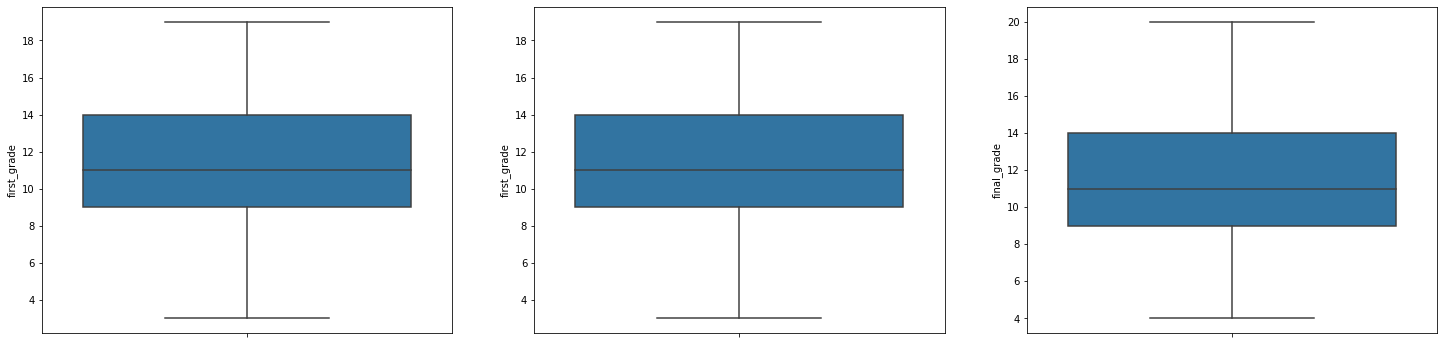

In [6]:
#check outlier
f, axes = plt.subplots(ncols=3, figsize=(25, 6))

sns.boxplot(y=dataset['first_grade'], ax=axes[0])
sns.boxplot(y=dataset['first_grade'], ax=axes[1])
sns.boxplot(y=dataset['final_grade'], ax=axes[2])
plt.show()

In [7]:
#apply label encoder into dataset
label_encoder = LabelEncoder()
dataset.school = label_encoder.fit_transform(dataset.school)
dataset.reason = label_encoder.fit_transform(dataset.reason)
dataset.guardian = label_encoder.fit_transform(dataset.guardian)
dataset.gender = label_encoder.fit_transform(dataset.gender)
dataset.address = label_encoder.fit_transform(dataset.address)
dataset.family_size = label_encoder.fit_transform(dataset.family_size)
dataset.parent_cohabitation = label_encoder.fit_transform(dataset.parent_cohabitation)
dataset.mother_job = label_encoder.fit_transform(dataset.mother_job)
dataset.father_job = label_encoder.fit_transform(dataset.father_job)
dataset.school_support = label_encoder.fit_transform(dataset.school_support)
dataset.family_support = label_encoder.fit_transform(dataset.family_support)
dataset.extra_paid_class = label_encoder.fit_transform(dataset.extra_paid_class)
dataset.extra_activity_curriculum = label_encoder.fit_transform(dataset.extra_activity_curriculum)
dataset.nursery = label_encoder.fit_transform(dataset.nursery)
dataset.higher = label_encoder.fit_transform(dataset.higher)
dataset.home_internet = label_encoder.fit_transform(dataset.home_internet)
dataset.romantic = label_encoder.fit_transform(dataset.romantic)

In [8]:
#to see target correlations
dataset.corr()['final_grade'].sort_values()

number_fail_class           -0.293831
school_support              -0.238365
number_absences             -0.213129
week_alcohol                -0.190054
go_out                      -0.177383
daily_alcohol               -0.140690
age                         -0.140372
travel_time                 -0.099785
school                      -0.083615
current_health              -0.081691
family_support              -0.067305
guardian                    -0.062544
romantic                    -0.049944
extra_paid_class            -0.028899
parent_cohabitation         -0.026665
free_time                   -0.021589
nursery                      0.026541
family_relationship          0.037711
family_size                  0.039744
extra_activity_curriculum    0.058600
reason                       0.060883
father_job                   0.070625
mother_job                   0.083822
gender                       0.102448
home_internet                0.111624
higher                       0.113419
study_time  

In [9]:
#drop the dataset features
dataset.drop(['number_fail_class','school_support','number_absences','school','guardian',
             'week_alcohol','go_out','daily_alcohol', 'age','travel_time','current_health',
             'family_support','romantic','extra_paid_class','parent_cohabitation','free_time','first_grade',
             'second_grade'], axis=1, inplace=True)

In [10]:
dataset.dtypes

gender                       int64
address                      int64
family_size                  int64
mother_edu                   int64
father_edu                   int64
mother_job                   int64
father_job                   int64
reason                       int64
study_time                   int64
extra_activity_curriculum    int64
nursery                      int64
higher                       int64
home_internet                int64
family_relationship          int64
final_grade                  int64
dtype: object

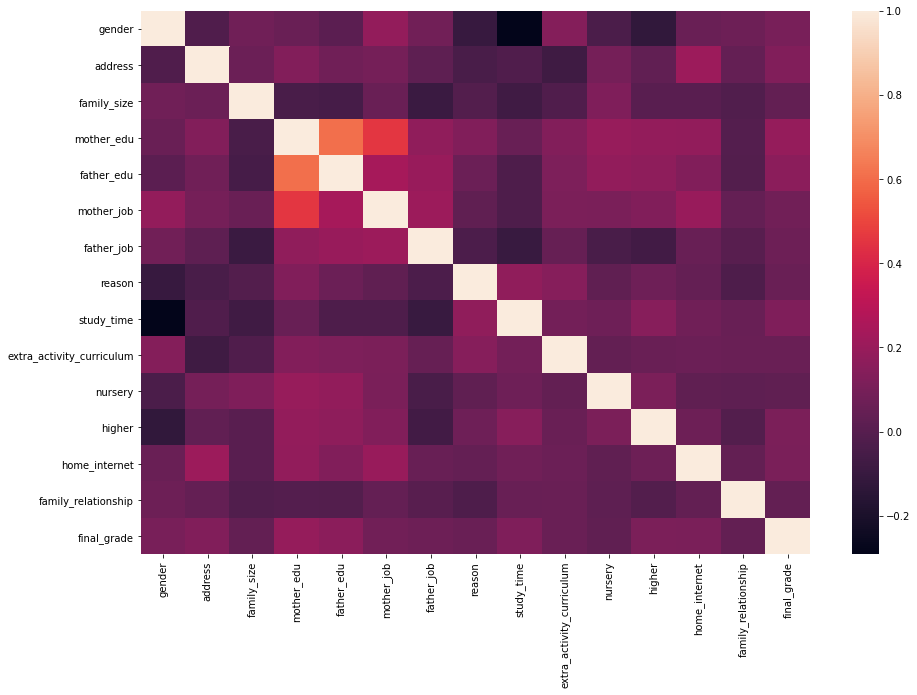

In [11]:
#correlations
plt.figure(figsize=(15,10))
correlation = dataset.corr(method='pearson')
sns.heatmap(correlation,
           xticklabels=correlation.columns.values,
           yticklabels=correlation.columns.values)
plt.show()

In [12]:
#define X and Y
X = dataset.drop('final_grade', axis=1)
Y = dataset['final_grade']

In [13]:
#apply train_test_split dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(249, 14)
(249,)
(108, 14)
(108,)


<h3>Train Model</h3>

In [14]:
#define the model
model = XGBRFRegressor()
model.fit(x_train, y_train)
print(model)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)


<h3>Evaluate Model</h3>

In [15]:
#Try to prediction & test
y_prediction = model.predict(x_test)

In [16]:
#check the result
y_prediction_values = pd.DataFrame(list(zip(y_test[0:10], y_prediction[0:10])), 
                                     columns=['Y_Test', 'Y_Predicted'])
y_prediction_values.head(5)

,Y_Test,Y_Predicted
0,12,9.654793
1,14,11.560392
2,12,12.843792
3,9,9.153896
4,12,12.365641


In [19]:
# calculat evaluation measures: mean-square-error and r2-score
mse = metrics.mean_squared_error(y_test, y_prediction)
mae = metrics.mean_absolute_error(y_test, y_prediction)
r2 = metrics.r2_score(y_test, y_prediction)

print("##" * 58)
print('Mean squared error: ', mse)
print("##" * 58)
print('Mean absolute error: ', mae)
print("##" * 58)
print('R2 score: ', r2)
print("##" * 58)

####################################################################################################################
Mean squared error:  9.898038300905228
####################################################################################################################
Mean absolute error:  2.5234322018093533
####################################################################################################################
R2 score:  0.06882566507163346
####################################################################################################################


In [20]:
#Check train data score of model
train_score = model.score(x_train, y_train)
print("Model Score:", train_score)
print("**" * 58)
print("Model Score (%) :", train_score * 100)

Model Score: 0.5594894226302911
********************************************************************************************************************
Model Score (%) : 55.94894226302911


In [21]:
#Check test data score of model
test_score = model.score(x_test, y_test)
print("Model Score:", test_score)
print("**" * 58)
print("Model Score (%) :", test_score * 100)

Model Score: 0.06882566507163346
********************************************************************************************************************
Model Score (%) : 6.882566507163346


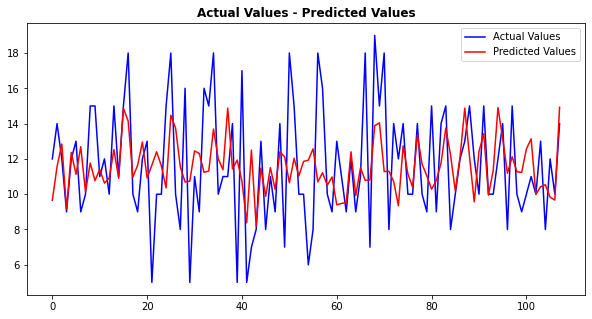

In [26]:
#let see the result
plt.figure(figsize=(10,5))
plt.plot(y_test, color='b')
plt.plot(y_prediction, color='r')
plt.legend(['Actual Values', 'Predicted Values'])
plt.title("Actual Values - Predicted Values", fontweight='bold')
plt.show()